In [1]:
%matplotlib inline
import sys
sys.path.append("/Users/kzfm/mishima_syk/REINVENT")
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, Draw
import torch
from model import RNN
from data_structs import Vocabulary
from utils import seq_to_smiles

In [2]:
voc = Vocabulary(init_from_file="/Users/kzfm/mishima_syk/REINVENT/data/Voc")
Agent = RNN(voc)
Agent.rnn.load_state_dict(torch.load("/Users/kzfm/mishima_syk/13/generator_handson/sitagliptin_agent_3000/Agent.ckpt"))
seqs, agent_likelihood, entropy = Agent.sample(50)
smiles = seq_to_smiles(seqs, voc)

/Users/kzfm/mishima_syk/REINVENT/model.py:99: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob = F.softmax(logits)
/Users/kzfm/mishima_syk/REINVENT/model.py:100: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  log_prob = F.log_softmax(logits)


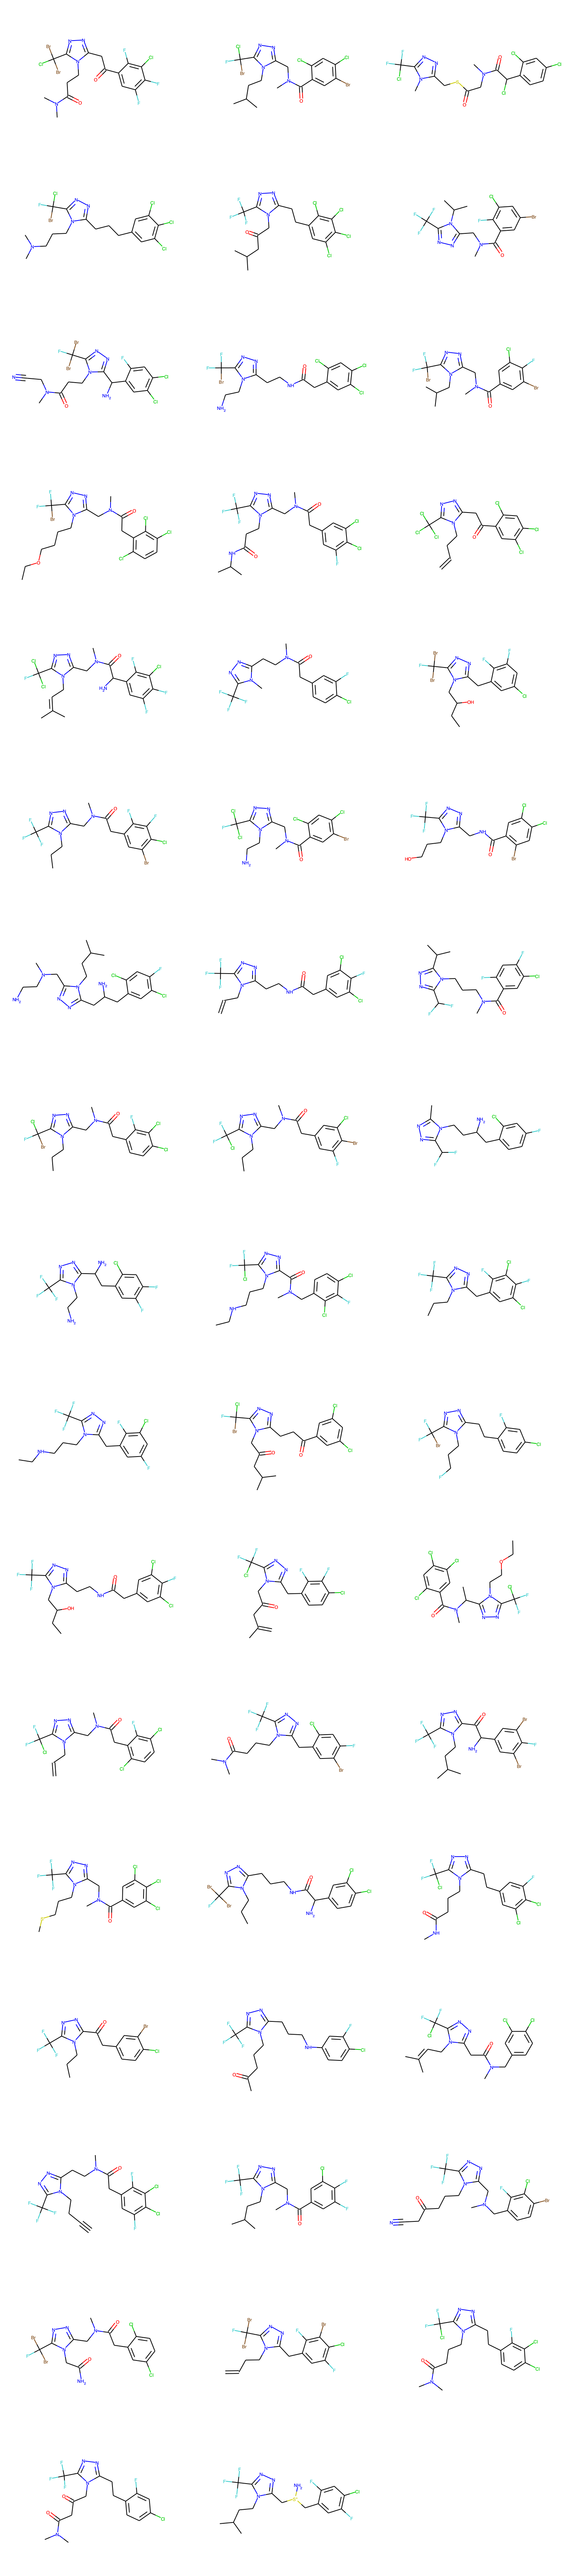

In [3]:
mols = []
for smi in smiles:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        mols.append(mol)

Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(500,400))